In [32]:
import numpy as np
import matplotlib.pyplot as plt



In [33]:
def plot(arr_x, arr_y):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(arr_x, 'b-', label='x(t)')
    plt.xlabel('Время t')
    plt.ylabel('x(t)')
    plt.title('Решение для x(t)')
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(arr_y, 'r-', label='y(t)')
    plt.xlabel('Время t')
    plt.ylabel('y(t)')
    plt.title('Решение для y(t)')
    plt.grid(True)
    plt.legend()
    plt.show()

In [34]:
h = 0.005

N = int(1 / h)

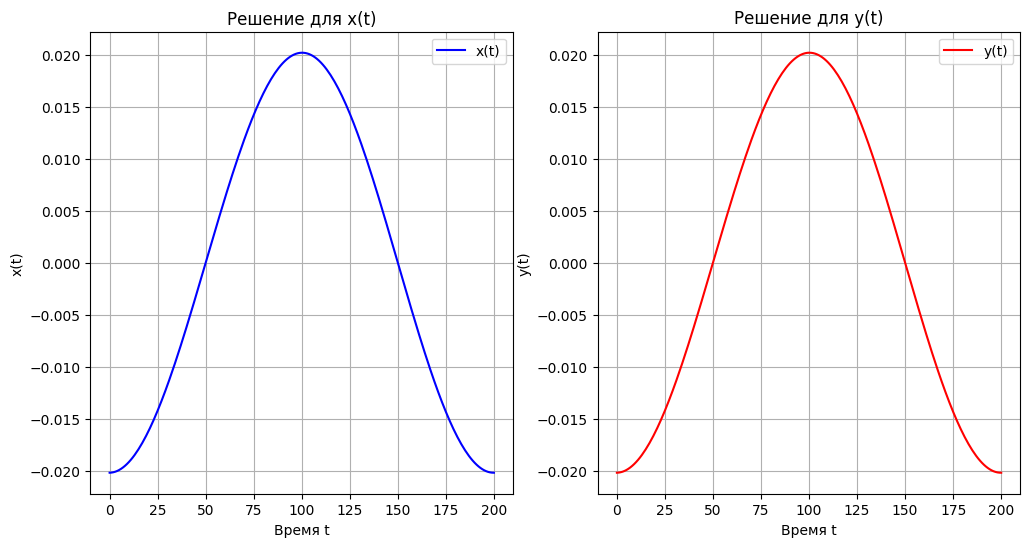

In [36]:
a_n = lambda x : 1
b_n = lambda x : -1 * (2 + h*h*(10 + np.sin(2 * np.pi * h*x)))
c_n = lambda x : 1
d_n = lambda x : h*h*np.cos(2 * np.pi * h*x)

x = np.array([], dtype = float)

for i in range(N):
    x = np.append(x, i * h)

alpha = np.array([], dtype = float)
beta = np.array([], dtype = float)
gamma = np.array([], dtype = float)


nu = np.zeros(N)
mu = np.zeros(N)
y = np.zeros(N+1)

alpha_0 = d_n(0) / b_n(0)
beta_0 = -1 * a_n(0) / b_n(0)
gamma_0 = -1 * c_n(0) / b_n(0)

alpha = np.append(alpha, alpha_0)
beta = np.append(beta, beta_0)
gamma = np.append(gamma, gamma_0)



for i in range(N-3):
    n = i+1
    alpha = np.append(alpha, (d_n(n) - c_n(n) * alpha[n - 1])/(b_n(n) + c_n(n) * beta[n-1]))
    beta = np.append(beta, -1 * a_n(n) / (b_n(n) + c_n(n) * beta[n-1]))
    gamma = np.append(gamma, -1 * c_n(n) * gamma[n-1] / (b_n(n) + c_n(n) * beta[n-1]))

alpha = np.append(alpha, (d_n(N-2) - c_n(N-2) * alpha[N-3])/(b_n(N-2) + c_n(N-2) * beta[N-3]))
gamma = np.append(gamma, -1 * (a_n(N-2) + c_n(N-2) * gamma[N-3]) / (b_n(N-2) + c_n(N-2) * beta[N-3]))


nu[N-1] = (d_n(N-1) - c_n(N-1)*alpha[N-2]) / (b_n(N-1) + c_n(N-1) * gamma[N-2])
mu[N-1] = -1 * (a_n(N-1)) / (b_n(N-1) + c_n(N-1) * gamma[N-2])



nu[N-2] = alpha[N-2] + gamma[N-2] * nu[N-1]
mu[N-2] = gamma[N-2]*mu[N-1]



for i in range(N-2):
    n = N-3 - i
    nu[n] = alpha[n] + beta[n] * nu[n + 1] + gamma[n] * nu[N-1]
    mu[n] = beta[n]*mu[n+1] + gamma[n] * mu[N-1]

y[0] = nu[0]/(1 - mu[0])


for i in range(1, N):
    y[i] = nu[i] + mu[i]*y[0]


y[N] = y[0]

plot(y, y)
